In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/flipkart_reviews.csv'

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('gdrive/My Drive/flipkart_reviews.csv',header=0)

In [ ]:
print(df.shape)


(1480, 28)


In [ ]:
df.head()

,Submission date,AppID,AppName,Country,Review Language,Version,Author,Rating,Title,Review,...,Updated,Semantic Tags,Semantic Categories,Semantic Sentiment,Notes,Likes,Dislikes,Link,Permalink,AF Link
0,2025-04-27T15:47:58+00:00,742044692,Flipkart - Online Shopping App,in,en,10.31.2,Lakanths,5,Seem less purchase,Great offer even during non festive period.,...,2025-04-29T03:34:42,NaN,NaN,Mixed,NaN,NaN,NaN,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/3929/review/308745966...,https://watch.appfollow.io/apps/my-first-works...
1,2025-04-27T11:50:26+00:00,742044692,Flipkart - Online Shopping App,in,en,10.31.2,Sarthak bedre,1,Useless app,This app is useless app,...,2025-04-29T03:34:42,Offensive,Report a Concern,Negative,NaN,NaN,NaN,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/3929/review/308745967...,https://watch.appfollow.io/apps/my-first-works...
2,2025-04-27T09:47:13+00:00,742044692,Flipkart - Online Shopping App,in,en,10.31.2,Sanmeghan,2,Blocking the big amount after cancelling the o...,Every bad service are u useless person owner ...,...,2025-04-29T03:34:42,"Customer Service,Refund Request","Monetization,User Feedback",Negative,NaN,NaN,NaN,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/3929/review/308745968...,https://watch.appfollow.io/apps/my-first-works...
3,2025-04-27T08:05:31+00:00,742044692,Flipkart - Online Shopping App,in,en,10.31.2,Arosh soni,5,Good job,Better materials,...,2025-04-29T03:34:42,NaN,NaN,Positive,NaN,NaN,NaN,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/3929/review/308745969...,https://watch.appfollow.io/apps/my-first-works...
4,2025-04-27T07:27:52+00:00,742044692,Flipkart - Online Shopping App,in,en,10.31.2,sk@1000,3,Facing issues while sharing product link,Facing issues while sharing product link,...,2025-04-29T03:34:42,Doesn't Work,Bugs,Negative,NaN,NaN,NaN,https://appstoreconnect.apple.com/WebObjects/i...,https://appfollow.io/app/3929/review/308745970...,https://watch.appfollow.io/apps/my-first-works...


In [ ]:
df['Review'] # data for sentimental analysis

,Review
0,Great offer even during non festive period.
1,This app is useless app
2,Every bad service are u useless person owner ...
3,Better materials
4,Facing issues while sharing product link
...,...
1475,Best
1476,Good
1477,Please don’t electronics product from Flipkart...
1478,Nice one


In [ ]:
print(df.columns)

Index(['Submission date', 'AppID', 'AppName', 'Country', 'Review Language',
       'Version', 'Author', 'Rating', 'Title', 'Review', 'Translated title',
       'Translated review', 'Reply Date', 'Reply Delta', 'Developer Reply',
       'User', 'Tags', 'Categories', 'Updated', 'Semantic Tags',
       'Semantic Categories', 'Semantic Sentiment', 'Notes', 'Likes',
       'Dislikes', 'Link', 'Permalink', 'AF Link'],
      dtype='object')


##**data preprocessing**

In [ ]:
import nltk  # Natural Language Toolkit for NLP tasks
import re            #python has inbuilt packagr called re, which can use to work with regular expressions
nltk.download('stopwords')   #the NLTK corpus is a massive dump of all kinds of natural language data sets that are definently worth taking a look at
from nltk.corpus import stopwords    #A stop is a commonly used word (such as "the","a","an","in") that a search engine has been programmed to ignore
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from textblob import TextBlob
TextBlob("I love it").sentiment.polarity  # returns 0.5


0.5

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("I love it!")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


{'neg': 0.0, 'neu': 0.182, 'pos': 0.818, 'compound': 0.6696}

#cleaning the reviews

In [ ]:
#cleaning the reviews

corpus = []
for i in range(0,len(df)):

  #999 records
  #cleaning special character from the reviews
  #the re.sub() method performs global search and global replace on the given data
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=str(df['Review'][i]))

    #convering the entire review into lowercase
    review = review.lower()

    #Tokenizing the review by words
    review_words = review.split()

    #removing the stop words
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]    #stopwords are the english wordswhich doesn't add much meaning to a sentence

      #streaming the stop words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    #joining the stemmed words
    review = ' '.join(review)

   #creating a corpus
    corpus.append(review)

In [ ]:
!pip install vaderSentiment # Install the vaderSentiment package

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # Import the SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
corpus[:1000]  # Preview first 1000 entries in the corpus

['great offer even non festiv period',
 'app useless app',
 'everi bad servic u useless person owner servic staff return offer mani item',
 'better materi',
 'face issu share product link',
 'back button work user friendli io imag screen',
 'superb',
 'easi purchas',
 'wosam',
 '',
 'best shop platform everyon buy lovabl product afford price',
 'good',
 'satisfi',
 'app goe constant loop verif frustrat share link anyon',
 'excel',
 'good qualiti product select',
 'worst deliveri experi order groceri everi month flipkart lunch room deliveri partner came took minut deliv qr order cod talk phone minut worst deliveri expert order flipkart',
 'worst experi',
 'exel',
 'tri share product option share whatsapp app',
 'terribl experi flipkart find contact detail provid support top cancel order like even tri help opinion meesho better custom servic',
 'order nokia phone chines also defect replac refund money worst custom servic sell fake product',
 'deliveri servic bad return polici also bad',


In [ ]:
#creating the bags of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)  #max_features = 1000
X = cv.fit_transform(corpus).toarray()
# Access the 'Review' column using the column name directly with .loc
y = df.loc[:,'Rating'].values # Changed iloc to loc and used column name

In [ ]:
from sklearn.model_selection import train_test_split   #used to test the data into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.40,random_state = 0)

In [ ]:
#Fitting Naive Bayes to the Training set

from sklearn.naive_bayes import MultinomialNB
# the multinomial Naive Bayes classifier is suitable for classification with discrete features(e.g., word counts for text classification).

classifier = MultinomialNB()
classifier.fit(X_train,y_train)  #fit training data

MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score
#in python, the accuracy_score function of the sklearn. metrics package calculates the accuracy the accuracy score for a set of predicted labels against the true labels.

# Predict using the trained classifier
y_pred = classifier.predict(X_test)  #predict the test data

score1 = accuracy_score(y_test,y_pred)


print("-------scores--------")
print("Accuracy score is : {}%".format(round(score1*100,2)))

-------scores--------
Accuracy score is : 72.97%


##Confusion matrix visualization

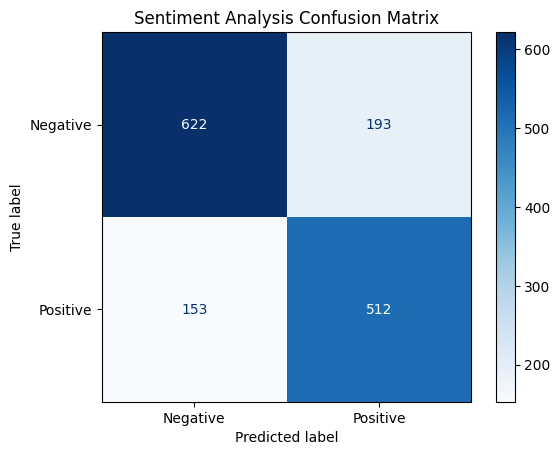

              precision    recall  f1-score   support

    Negative       0.80      0.76      0.78       815
    Positive       0.73      0.77      0.75       665

    accuracy                           0.77      1480
   macro avg       0.76      0.77      0.76      1480
weighted avg       0.77      0.77      0.77      1480



In [ ]:
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'Rating' column contains the actual sentiment (1 for positive, 0 for negative)
# Replace 'Rating' with the correct column name if it's different
df['true_label'] = df['Rating'].apply(lambda x: 1 if x > 3 else 0)  # Create 'true_label' based on ratings

# Sample sentiment function using TextBlob
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    return 1 if polarity > 0 else 0  # 1 = Positive, 0 = Negative

# Apply sentiment analysis
df['predicted_label'] = df['Review'].apply(get_sentiment)

# Confusion Matrix
cm = confusion_matrix(df['true_label'], df['predicted_label'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Sentiment Analysis Confusion Matrix')
plt.show()

# Detailed classification report
print(classification_report(df['true_label'], df['predicted_label'], target_names=['Negative', 'Positive']))